In [1]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import pandas as pd

def pol2cart(r, tet, phi):
    x = r*np.sin(tet)*np.cos(phi)
    y = r*np.sin(tet)*np.sin(phi)
    z = r*np.cos(tet)
    return x,y,z

def cart2pol(vec):
    x = vec[0]
    y = vec[1]
    z = vec[2]
    r = np.linalg.norm(vec)
    tet = np.arccos(z/r)
    phi = np.arctan(y/x)
    return r, tet, phi

def r_ort(tet, phi):
    x = np.sin(tet)*np.cos(phi)
    y = np.sin(tet)*np.sin(phi)
    z = np.cos(tet)
    return np.array([x, y, z])

def tet_ort(tet, phi):
    x = np.cos(tet)*np.cos(phi)
    y = np.cos(tet)*np.sin(phi)
    z = -np.sin(tet)
    return np.array([x, y, z])

def phi_ort(tet, phi):
    x = -np.sin(phi)
    y = np.cos(phi)
    z = 0
    return np.array([x, y, z])


In [71]:
def StonerWohlfarth_Heff(M, Hkeff):
    M_abs, M_tet, M_phi = cart2pol(M)
    
    r=0
    #r = 0.5*Hkeff*(np.cos(M_tet)**2)
    tet = -0.5*Hkeff*np.sin(2.0*M_tet)
    
    return r*r_ort(M_tet, M_phi) + tet*tet_ort(M_tet, M_phi)

def IEC_Heff1(M1, M2, J, mu0, t1):
    M1_abs, M1_tet, M1_phi = cart2pol(M1)
    M2_abs, M2_tet, M2_phi = cart2pol(M2)
    
    K = J/(mu0*t1)
    return -K*(M2/M2_abs)*(2.0/M1_abs)

def IEC_Heff2(M1, M2, J, mu0, t2):
    return IEC_Heff1(M2, M1, J, mu0, t2)

In [ ]:
gamma1 = 5e8
gamma2 = gamma1

alpha1 = 0.018
alpha2 = alpha1

Ms1_g = 300.0
Ms2_g = Ms1_g

Hkeff1 = 6100.0
Hkeff2 = Hkeff1

t1 = 5e-9
t2 = t1

J = 0
mu0 = 4*np.pi*1e-7

Hext = np.array([100.0,0.0,0.0])#np.array(pol2cart(2000.0, np.deg2rad(80.0), 0.0))


def LLG_right(M, Heff, gamma, alpha):
    Ms = np.linalg.norm(M)
    
    first = np.cross(M, Heff)
    second = (alpha/Ms)*np.cross(M, np.cross(M, Heff))
    
    return -(gamma/(1+alpha**2))*(first + second)


def model(t,M1_M2):
    M1 = M1_M2[0:3]
    M2 = M1_M2[3:6]
    
    Heff1 = Hext + StonerWohlfarth_Heff(M1, Hkeff1) + IEC_Heff1(M1, M2, J, mu0, t1)
    Heff2 = Hext + StonerWohlfarth_Heff(M2, Hkeff2) + IEC_Heff2(M1, M2, J, mu0, t2)
    
    LLG1 = LLG_right(M1, Heff1, gamma1, alpha1)
    LLG2 = LLG_right(M2, Heff2, gamma2, alpha2)
    
    return np.append(LLG1, LLG2)


M01 = pol2cart(Ms1_g, np.deg2rad(20.0), 0.0)
M02 = pol2cart(Ms2_g, np.deg2rad(20.0), 0.0)
M01_M02 = np.append(M01, M02)

sol = solve_ivp(model, [0.0, 5.0e-12], M01_M02, method = 'LSODA')

df = pd.DataFrame()
df['t'] = sol.t
df['x1'] = sol.y[0]
df['y1'] = sol.y[1]
df['z1'] = sol.y[2]
#df['x2'] = sol.y[3]
#df['y2'] = sol.y[4]
#df['z2'] = sol.y[5]
#df = df.set_index('t')
df

<IPython.core.display.Javascript object>


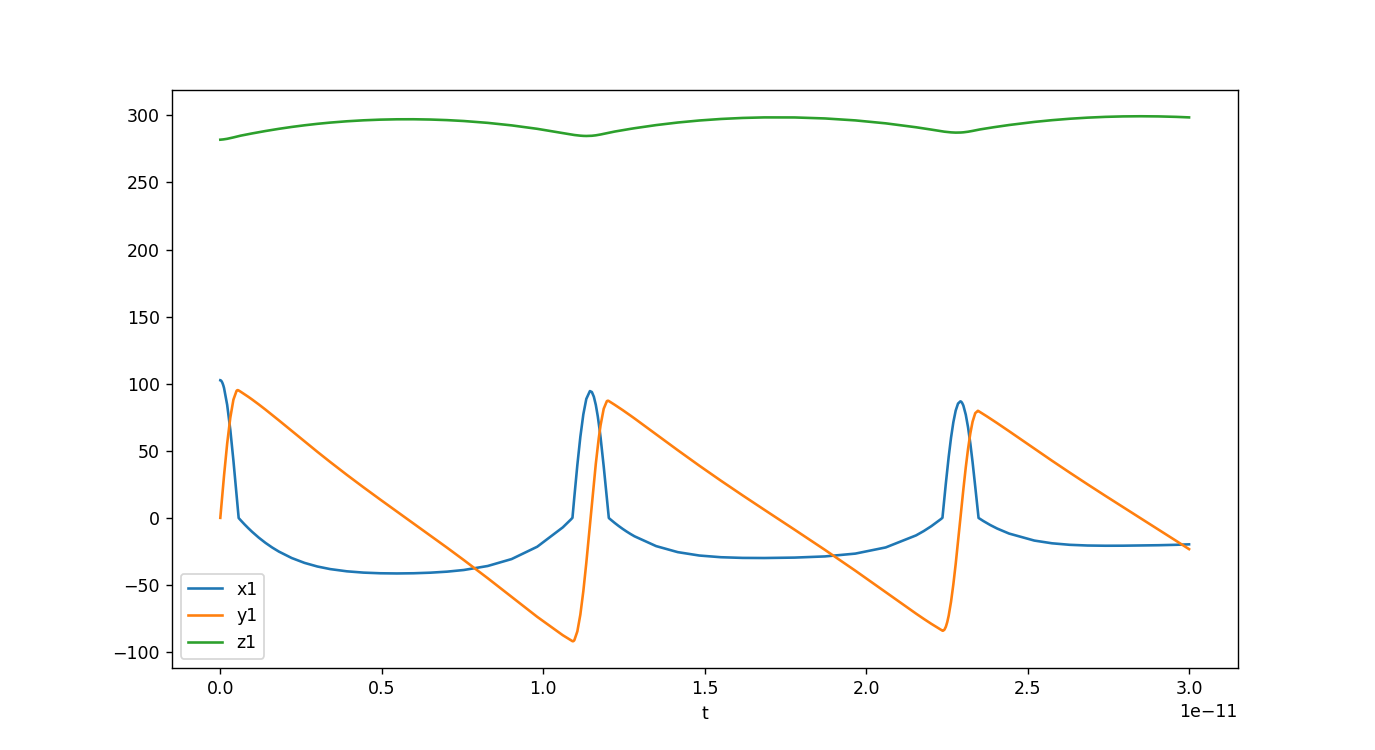

<AxesSubplot:xlabel='t'>

In [69]:
#%matplotlib inline
%matplotlib notebook
#%matplotlib qt

df.plot('t', figsize = (11, 6))
#plt.plot(df.t, np.rad2deg(np.arctan(df.x1/df.z1)))
#plt.plot(sol.t, sol.y[0]**2 + sol.y[1]**2 + sol.y[2]**2)


<IPython.core.display.Javascript object>


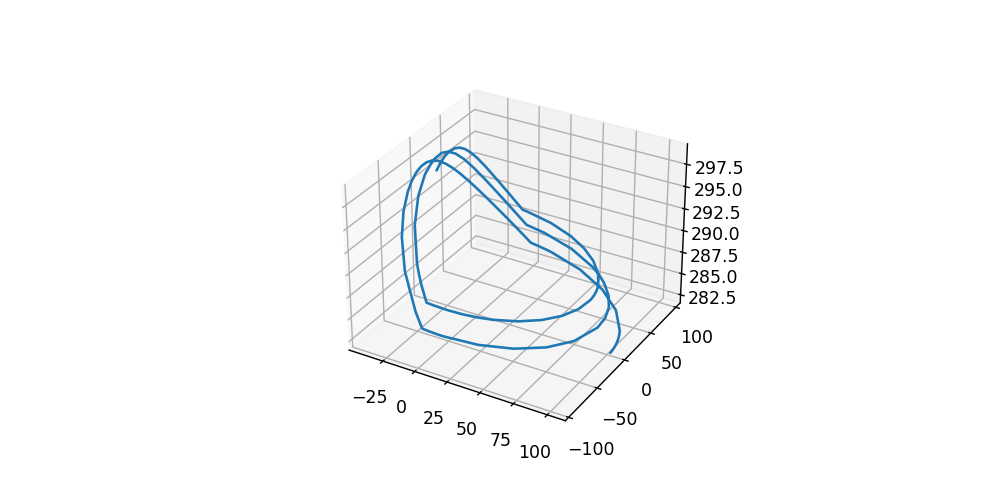

In [70]:
#%matplotlib inline
%matplotlib notebook
#%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])

#heff = [];
#for i in range(len(sol.t)):
#    heff.append(Heff(Hext, sol.y.T[i]))

#heff = np.array(heff).T

#ax.plot(heff[0], heff[1], heff[2])

<IPython.core.display.Javascript object>


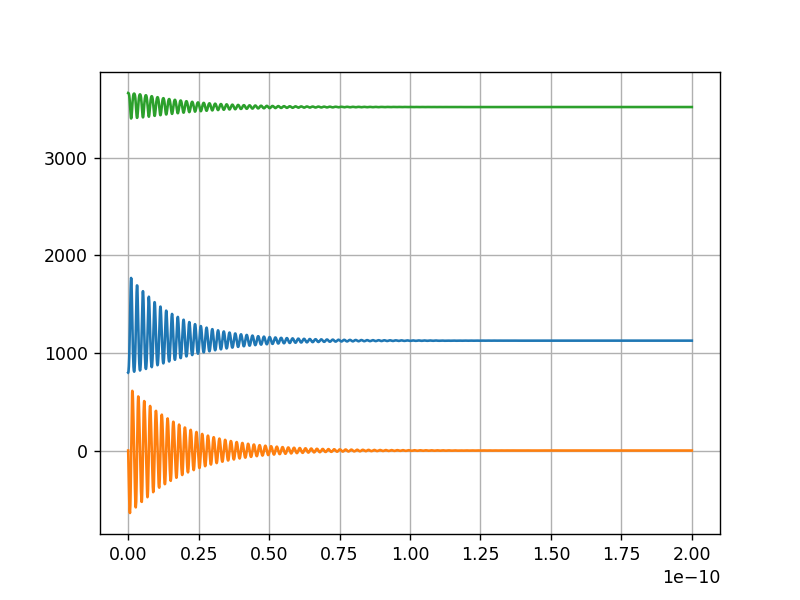

In [11]:

%matplotlib notebook
plt.grid(True)
plt.plot(sol.t, heff[0])
plt.plot(sol.t, heff[1])
plt.plot(sol.t, heff[2])

In [133]:
Heff(Hext, M0)

array([-3928.13389116,    -0.        ,  1790.43286243])

In [100]:
Hext

array([1969.61550602,    0.        ,  347.29635533])

In [101]:
M0

array([100.,   0., 150.])

<IPython.core.display.Javascript object>


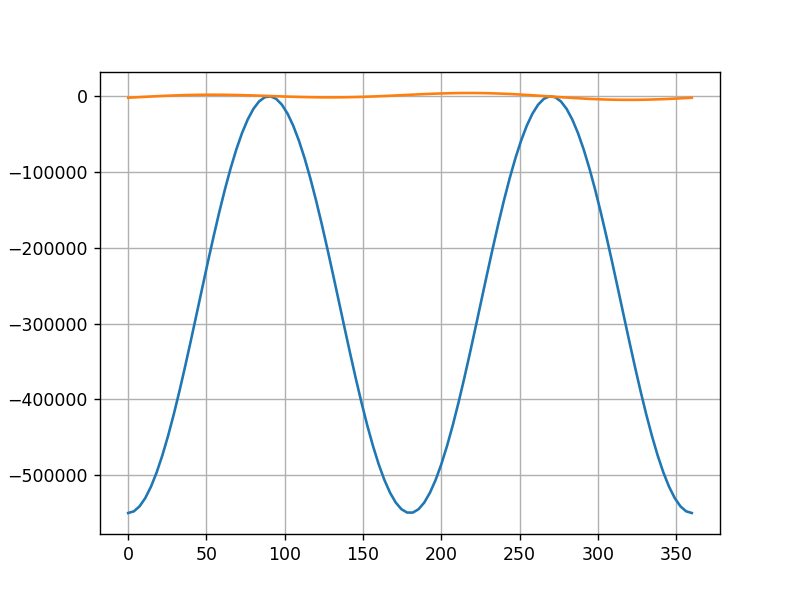

In [137]:
%matplotlib notebook
def F(Hext, M, tet):
    H_abs, H_tet, H_phi = cart2pol(Hext)
    M_abs, M_tet, M_phi = cart2pol(M)
    return -M_abs*H_abs*np.cos(H_tet - tet) - 0.5*M_abs*Hkeff*(np.cos(tet)**2)
    
def dF(Hext, M, tet):
    H_abs, H_tet, H_phi = cart2pol(Hext)
    M_abs, M_tet, M_phi = cart2pol(M)
    return 0.5*Hkeff*np.sin(2*tet) - H_abs*np.sin(H_tet - tet)
    
x = np.linspace(0,2*np.pi, 100)
y = []
y2 = []
for i in range(len(x)):
    y.append(F(Hext, M0, x[i]))
    y2.append(dF(Hext, M0, x[i]))

y = np.array(y)
plt.plot(np.rad2deg(x), y)
plt.plot(np.rad2deg(x), y2)
plt.grid()

In [149]:
Heff(Hext, M0)

array([1969.61550602,    0.        ,  347.29635533])

In [7]:
a = np.array([1,3])
b = np.array([2,3])
np.append(a, b)

array([1, 3, 2, 3])